In [2]:
import os
import pandas as pd
import numpy as np
import math
import pickle
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
df_nodes = pd.read_csv(os.path.realpath('../../ceng541/nodes.csv'))
df_edges = pd.read_csv(os.path.realpath('../../ceng541/edges.csv'))

In [4]:
df_edges['name1'] = None
df_edges['name2'] = None
for i in range(len(df_edges)):
    id1 = df_edges.at[i, 'id1']
    id2 = df_edges.at[i, 'id2']
    df_edges.at[i, 'name1'] = df_nodes[df_nodes['id'] == id1]['name'].values[0]
    df_edges.at[i, 'name2'] = df_nodes[df_nodes['id'] == id2]['name'].values[0]

In [5]:
df_edges.head(5)

,id1,id2,conf,name1,name2
0,300,301,0.535971,2_Chainz,Big_Sean
1,300,302,0.438849,2_Chainz,DJ_Khaled
2,300,303,0.760791,2_Chainz,Drake
3,300,304,0.618705,2_Chainz,Future
4,300,305,0.415468,2_Chainz,Gucci_Mane


In [47]:
def getDuplicatesWithCount(listOfElems):
    ''' Get frequency count of duplicate elements in the given list '''
    dictOfElems = dict()
    # Iterate over each element in list
    for elem in listOfElems:
        # If element exists in dict then increment its value else add it in dict
        if elem in dictOfElems:
            dictOfElems[elem] += 1
        else:
            dictOfElems[elem] = 1    
 
    # Filter key-value pairs in dictionary. Keep pairs whose value is greater than 1 i.e. only duplicate elements from list.
    dictOfElems = { key:value for key, value in dictOfElems.items() if value > 1}
    # Returns a dict of duplicate elements and thier frequency count
    return dictOfElems

listOfElems = df_edges['name1'].values
print(len(listOfElems))
listOfElems = np.append(listOfElems, df_edges['name2'].values)
print(len(listOfElems))

dictOfElems = getDuplicatesWithCount(listOfElems)  

sortedDictOfElems = dict(sorted(dictOfElems.items(), key=lambda item: item[1], reverse=True))

for key, value in sortedDictOfElems.items():
        print(key , '\t\t', value)


840
1680
Drake 		 104
Kanye_West 		 78
Kendrick_Lamar 		 76
Future 		 74
Big_Sean 		 70
Rae_Sremmurd 		 66
J._Cole 		 54
Post_Malone 		 48
Migos 		 46
Travis_Scott 		 44
Chris_Brown 		 40
Lil_Uzi_Vert 		 38
DJ_Khaled 		 34
Rihanna 		 34
Wiz_Khalifa 		 32
2_Chainz 		 30
Fetty_Wap 		 30
Young_Thug 		 28
Lil_Wayne 		 28
JAY_Z 		 26
The_Chainsmokers 		 26
G-Eazy 		 26
Gucci_Mane 		 24
A$AP_Rocky 		 24
Chance_The_Rapper 		 24
21_Savage 		 22
Beyonce 		 22
Nicki_Minaj 		 22
Childish_Gambino 		 22
French_Montana 		 22
Jeremih 		 22
The_Weeknd 		 22
Maroon_5 		 22
Kodak_Black 		 20
Calvin_Harris 		 20
Flo_Rida 		 18
Ed_Sheeran 		 16
DRAM 		 16
Logic 		 14
Meek_Mill 		 14
Jason_Derulo 		 12
Ty_Dolla_$ign 		 12
Justin_Bieber 		 10
Usher 		 10
KYLE 		 10
Desiigner 		 10
ScHoolboy_Q 		 10
Ariana_Grande 		 8
Bruno_Mars 		 8
Justin_Timberlake 		 8
Katy_Perry 		 8
Miley_Cyrus 		 8
Tyga 		 8
DJ_Snake 		 8
David_Guetta 		 8
Major_Lazer 		 8
Trey_Songz 		 8
A$AP_Ferg 		 6
Kygo 		 6
Mac_Miller 		 6
Emine

In [6]:
df_nodes.head(5)

,id,louvain,name
0,300,11,2_Chainz
1,301,11,Big_Sean
2,302,11,DJ_Khaled
3,303,7,Drake
4,304,11,Future


In [8]:
G = nx.Graph()

for i in range(len(df_edges)):
    G.add_edge(df_edges.at[i, 'name1'], df_edges.at[i, 'name2'], weight=df_edges.at[i, 'conf'])


In [9]:
clusters = list(set(df_nodes['louvain']))
colors = ["#442288", "#6CA2EA", "#B5D33D", "#FED23F", "#EB7D5B"]

In [10]:
color_map = []
partitions = []
for node in G:
    cluster = df_nodes[df_nodes['name'] == node]['louvain'].values[0]
    color = colors[clusters.index(cluster)]
    partition = clusters.index(cluster)
    color_map.append(color)
    partitions.append(partition)

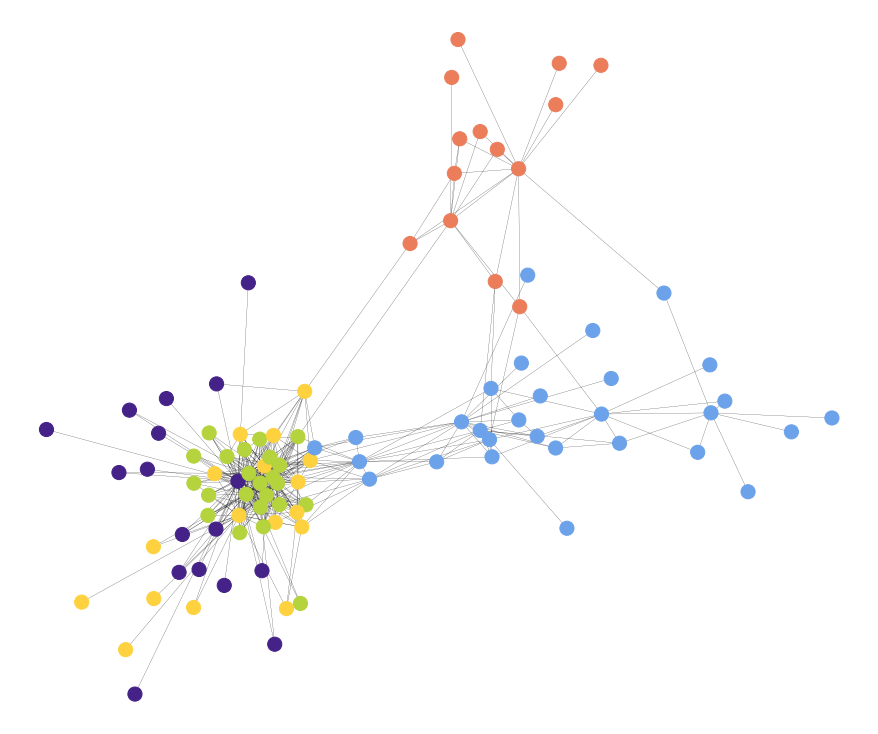

In [11]:
pos = nx.spring_layout(G)
plt.figure(figsize=(12,10)) 
nx.draw(G, pos, cmap=plt.cm.RdYlBu, node_size=200, node_color=color_map, with_labels=False, width=0.2)
plt.show()

In [13]:
df_nodes_sorted = df_nodes.sort_values(by=['louvain']).reset_index()

nodes = df_nodes_sorted['name'].values
clusters = df_nodes_sorted['louvain'].values

new_cluster_ids = {}

for new, old in enumerate(sorted(list(set(clusters)))):
    new_cluster_ids[old] = new

new_cluster_ids

new_clusters = []

for _ in clusters:
    new_clusters.append(new_cluster_ids[_]) 

print(new_clusters)

artist_to_community = {}
i = 0
for _ in range(len(df_nodes_sorted)):
    artist_to_community[nodes[_]] = new_clusters[_]
    #artist_to_community[i] = new_clusters[_]
    i = i+1
artist_to_community

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


{'Wale': 0,
 'Waka_Flocka_Flame': 0,
 'A_Boogie_Wit_da_Hoodie': 0,
 'Amine': 0,
 'T-Pain': 0,
 'Russ': 0,
 'PARTYNEXTDOOR': 0,
 'Mac_Miller': 0,
 'Lil_Yachty': 0,
 'Yo_Gotti': 0,
 'Kid_Ink': 0,
 'Desiigner': 0,
 'Bryson_Tiller': 0,
 'Tyga': 0,
 'Drake': 0,
 'Kevin_Gates': 0,
 'YG': 0,
 'Ty_Dolla_$ign': 1,
 'Logic': 1,
 'ScHoolboy_Q': 1,
 'KYLE': 1,
 'French_Montana': 1,
 'Chance_The_Rapper': 1,
 '2_Chainz': 1,
 'A$AP_Ferg': 1,
 'Big_Sean': 1,
 'DJ_Khaled': 1,
 'Future': 1,
 'Gucci_Mane': 1,
 'Khalid': 1,
 'Kendrick_Lamar': 1,
 'Migos': 1,
 'Post_Malone': 1,
 'Lil_Uzi_Vert': 1,
 'Travis_Scott': 1,
 'Young_Thug': 1,
 '21_Savage': 1,
 'Kodak_Black': 1,
 'Rae_Sremmurd': 1,
 'DRAM': 1,
 'Fetty_Wap': 2,
 'Kid_Cudi': 2,
 'Snoop_Dogg': 2,
 'The_Weeknd': 2,
 'Meek_Mill': 2,
 'Eminem': 2,
 'T.I.': 2,
 'G-Eazy': 2,
 'J._Cole': 2,
 'Kanye_West': 2,
 'Wiz_Khalifa': 2,
 '50_Cent': 2,
 'A$AP_Rocky': 2,
 'JAY_Z': 2,
 'Lil_Wayne': 2,
 'Childish_Gambino': 2,
 'B.o.B': 2,
 'The_Chainsmokers': 3,
 'Sia': 

In [31]:
#%matplotlib notebook
from netgraph import Graph, InteractiveGraph

edges = []
for i in range(len(df_edges)):
    edges.append((df_edges.at[i, 'name1'], df_edges.at[i, 'name2'], round(df_edges.at[i, 'conf'],3)))

print(edges)

[('2_Chainz', 'Big_Sean', 0.536), ('2_Chainz', 'DJ_Khaled', 0.439), ('2_Chainz', 'Drake', 0.761), ('2_Chainz', 'Future', 0.619), ('2_Chainz', 'Gucci_Mane', 0.415), ('2_Chainz', 'J._Cole', 0.468), ('2_Chainz', 'Kanye_West', 0.516), ('2_Chainz', 'Kendrick_Lamar', 0.662), ('2_Chainz', 'Lil_Uzi_Vert', 0.477), ('2_Chainz', 'Migos', 0.536), ('2_Chainz', 'Post_Malone', 0.462), ('2_Chainz', 'Rae_Sremmurd', 0.502), ('2_Chainz', 'Travis_Scott', 0.475), ('2_Chainz', 'Wiz_Khalifa', 0.419), ('2_Chainz', 'Young_Thug', 0.432), ('Big_Sean', '2_Chainz', 0.316), ('Big_Sean', '21_Savage', 0.258), ('Big_Sean', 'A$AP_Rocky', 0.319), ('Big_Sean', 'Chance_The_Rapper', 0.411), ('Big_Sean', 'Childish_Gambino', 0.36), ('Big_Sean', 'Chris_Brown', 0.385), ('Big_Sean', 'DJ_Khaled', 0.407), ('Big_Sean', 'DRAM', 0.488), ('Big_Sean', 'Drake', 0.355), ('Big_Sean', 'Fetty_Wap', 0.502), ('Big_Sean', 'French_Montana', 0.498), ('Big_Sean', 'Future', 0.512), ('Big_Sean', 'G-Eazy', 0.376), ('Big_Sean', 'Gucci_Mane', 0.547),

In [15]:
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
    4 : 'tab:purple'
}
node_color = {node: community_to_color[community_id] for node, community_id in artist_to_community.items()}

print(node_color)

{'Wale': 'tab:blue', 'Waka_Flocka_Flame': 'tab:blue', 'A_Boogie_Wit_da_Hoodie': 'tab:blue', 'Amine': 'tab:blue', 'T-Pain': 'tab:blue', 'Russ': 'tab:blue', 'PARTYNEXTDOOR': 'tab:blue', 'Mac_Miller': 'tab:blue', 'Lil_Yachty': 'tab:blue', 'Yo_Gotti': 'tab:blue', 'Kid_Ink': 'tab:blue', 'Desiigner': 'tab:blue', 'Bryson_Tiller': 'tab:blue', 'Tyga': 'tab:blue', 'Drake': 'tab:blue', 'Kevin_Gates': 'tab:blue', 'YG': 'tab:blue', 'Ty_Dolla_$ign': 'tab:orange', 'Logic': 'tab:orange', 'ScHoolboy_Q': 'tab:orange', 'KYLE': 'tab:orange', 'French_Montana': 'tab:orange', 'Chance_The_Rapper': 'tab:orange', '2_Chainz': 'tab:orange', 'A$AP_Ferg': 'tab:orange', 'Big_Sean': 'tab:orange', 'DJ_Khaled': 'tab:orange', 'Future': 'tab:orange', 'Gucci_Mane': 'tab:orange', 'Khalid': 'tab:orange', 'Kendrick_Lamar': 'tab:orange', 'Migos': 'tab:orange', 'Post_Malone': 'tab:orange', 'Lil_Uzi_Vert': 'tab:orange', 'Travis_Scott': 'tab:orange', 'Young_Thug': 'tab:orange', '21_Savage': 'tab:orange', 'Kodak_Black': 'tab:oran

<IPython.core.display.Javascript object>


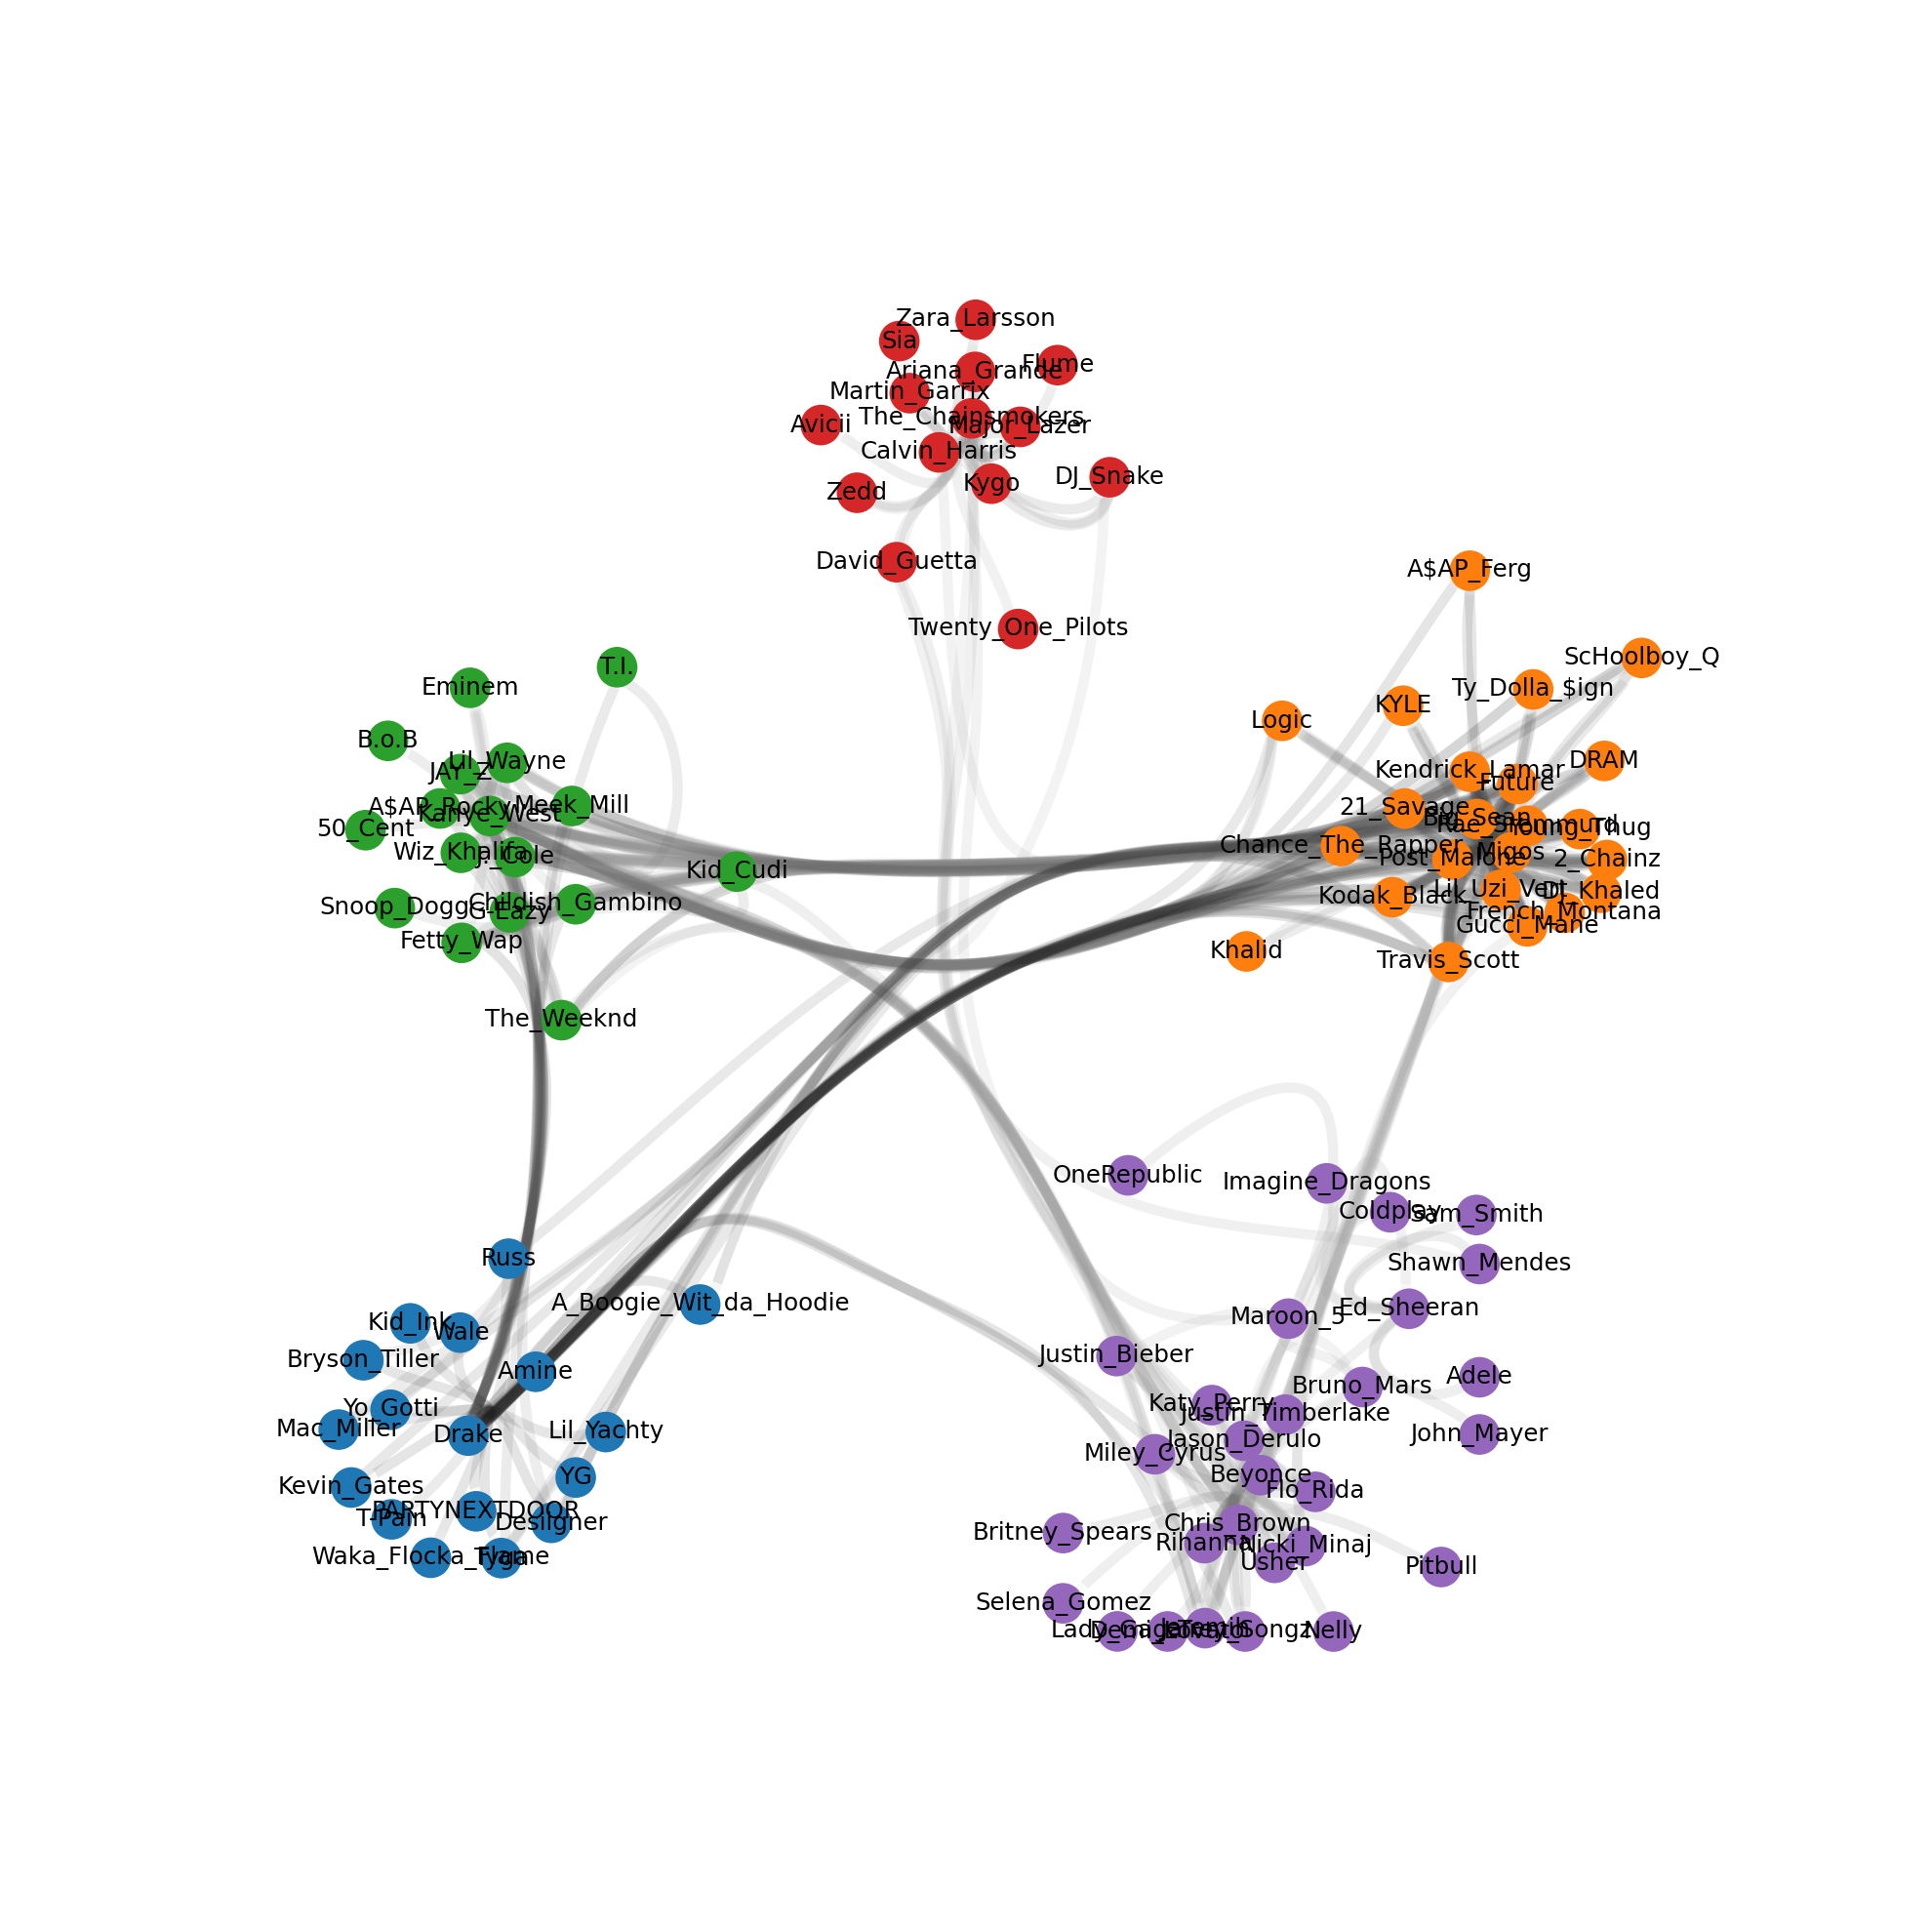

In [33]:
fig, ax = plt.subplots(figsize=(9, 9))

plt.ion()

plot_instance = Graph(edges, node_color=node_color, node_labels=True,
                      node_edge_width=0, edge_alpha=0.1,
                      node_layout='community', node_size=2,
                      node_label_fontdict=dict(size=8),
                      node_layout_kwargs=dict(node_to_community=artist_to_community),
                      edge_layout='bundled',
                      #edge_layout_kwargs=dict(k=2000),
                      ax = ax
)

plt.show()